In [969]:
#!pip install yfinance

# Time Series Data 

In [971]:
import yfinance as yf 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

stock_data = yf.download('AAPL',start = "2015-01-01")
stock_data.head(10)

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.288580,24.757334,23.848706,24.746226,212818400
2015-01-05,23.604330,24.137511,23.417718,24.057533,257142000
2015-01-06,23.606552,23.866477,23.244433,23.668756,263188400
2015-01-07,23.937569,24.037539,23.704302,23.815381,160423600
2015-01-08,24.857302,24.915063,24.148616,24.266361,237458000
2015-01-09,24.883966,25.159442,24.484081,25.030590,214798000
2015-01-12,24.270803,25.021698,24.170833,25.015034,198603200
2015-01-13,24.486298,25.059467,24.195271,24.755109,268367600


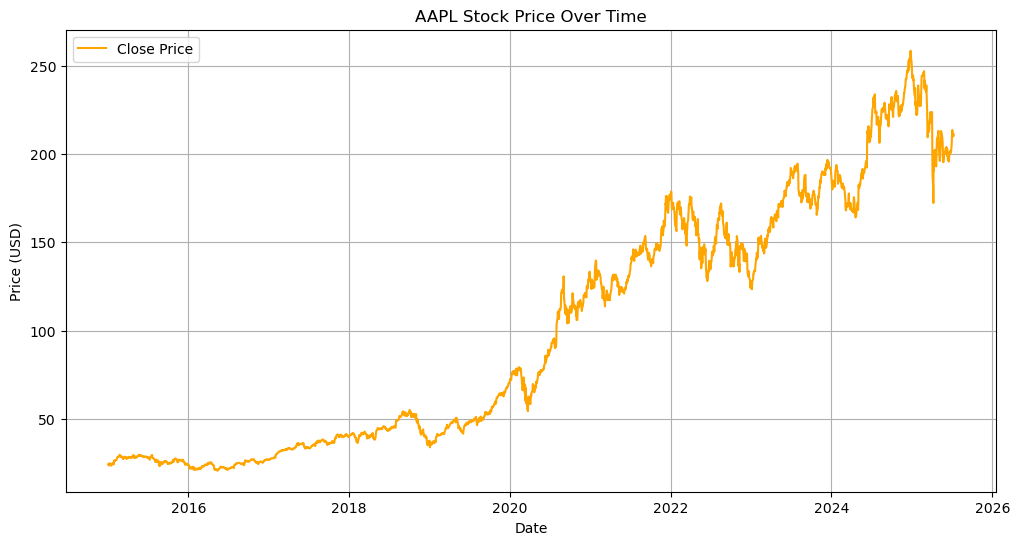

In [972]:
plt.figure(figsize=(12,6))
plt.plot(stock_data.index, stock_data['Close'], label = 'Close Price',color = 'orange' )
plt.title("AAPL Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)

plt.savefig("Data.png")
plt.show()

# Classical Time Series Decomposition

In [974]:
#!pip install statsmodels

In [975]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition_additive = seasonal_decompose(stock_data['Close'],model = 'additive',period=365)

In [976]:
trend_additive = decomposition_additive.trend
seasonal_additive = decomposition_additive.seasonal
residual_additive = decomposition_additive.resid

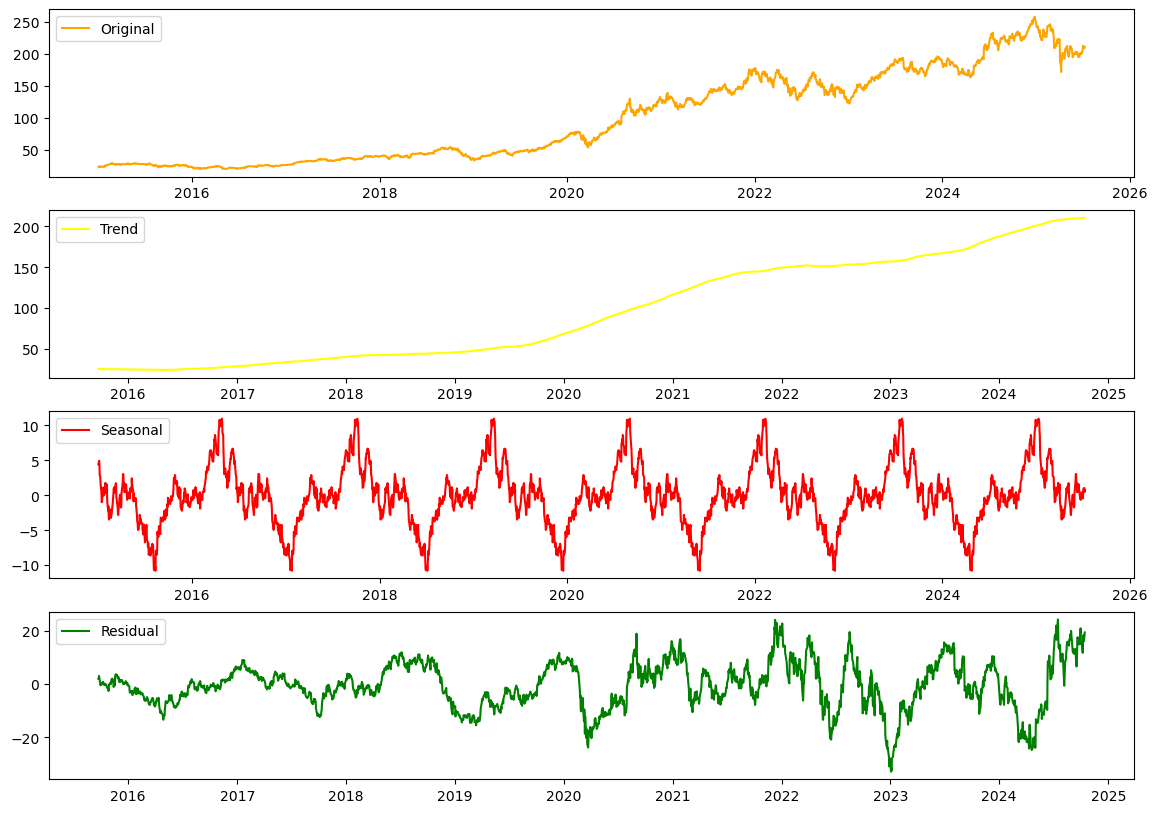

In [977]:
plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(stock_data['Close'],label="Original",color='orange')
plt.legend(loc="upper left")
#plt.savefig('Original.png')


plt.subplot(412)
plt.plot(trend_additive,label="Trend",color='yellow')
plt.legend(loc="upper left")
#plt.savefig('Trend.png')



plt.subplot(413)
plt.plot(seasonal_additive,label="Seasonal",color='red')
plt.legend(loc="upper left")
#plt.savefig('Seasonal.png')


plt.subplot(414)
plt.plot(residual_additive,label="Residual",color='green')
plt.legend(loc="upper left")
#plt.savefig('Residual.png')


plt.show()

# STL Decompostion 

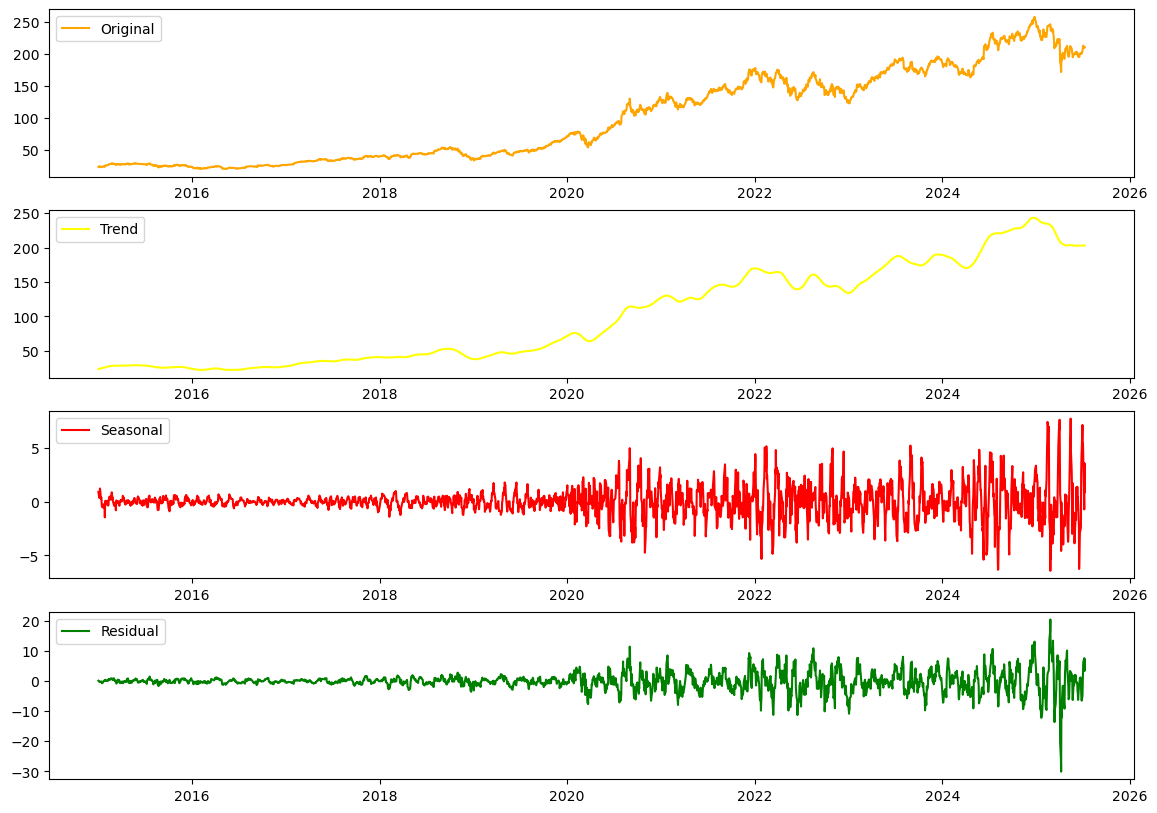

In [979]:
from statsmodels.tsa.seasonal import STL

stl = STL(stock_data['Close'],period=30)
result = stl.fit()

plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(result.observed,label="Original",color='orange')
plt.legend(loc="upper left")
#plt.savefig('Original.png')


plt.subplot(412)
plt.plot(result.trend,label="Trend",color='yellow')
plt.legend(loc="upper left")
#plt.savefig('Trend.png')



plt.subplot(413)
plt.plot(result.seasonal,label="Seasonal",color='red')
plt.legend(loc="upper left")
#plt.savefig('Seasonal.png')


plt.subplot(414)
plt.plot(result.resid,label="Residual",color='green')
plt.legend(loc="upper left")
#plt.savefig('Residual.png')


plt.show()

# Stationarity Test

In [981]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(stock_data['Close'])

print('Adf Test Results:')
print(f'Adf Statistics :{round(adf_test[0],3)}')
print(f'p-value:{round(adf_test[1],3)}')


Adf Test Results:
Adf Statistics :-0.241
p-value:0.933


#### This shows that the stock_data['Close'] is non stationary 

In [983]:
from statsmodels.tsa.stattools import kpss

kpss_test = kpss(stock_data['Close'], regression ='ct')

print('Kpss Test Results:')
print(f'Kpss Statistics :{round(kpss_test[0],3)}')
print(f'p-value:{round(kpss_test[1],3)}')


Kpss Test Results:
Kpss Statistics :1.118
p-value:0.01


#### This confirms that it is a non stationry data 

# Making Data Stationary 

In [986]:
def adf_test(series):
    adf_test = adfuller(series)
    print('Adf Test Results:')
    print('Adf Statistics ',(adf_test[0]))
    print('p-value',(adf_test[1]))

def kpss_test(series):
    kpss_test = kpss(stock_data['Close'], regression ='ct')
    print('Kpss Test Results:')
    print('Kpss Statistics ',(kpss_test[0]))
    print('p-value:',(kpss_test[1]))


In [987]:
prices = stock_data['Close']
prices = prices.iloc[:,0]

In [988]:
adf_test(prices)

Adf Test Results:
Adf Statistics  -0.24100827971213074
p-value 0.9334537275695305


In [989]:
adf_test(price_diff.dropna())

Adf Test Results:
Adf Statistics  -12.385776430747633
p-value 4.913328218752005e-23


In [990]:
0.0 <0.05

True

## Differencing

In [992]:
price_diff = prices.diff() # The data got stationary using differencing 

## Transformation

In [994]:
import numpy as np 
from scipy import stats 

# Logarithmic 
prices_log = np.log(prices)

# Square-Root 
prices_sqrt = np.sqrt(prices)

# Box-Cox -> they requires all positive values

In [995]:
prices_sqrt

Date
2015-01-02     4.928345
2015-01-05     4.858429
2015-01-06     4.858657
2015-01-07     4.892603
2015-01-08     4.985710
                ...    
2025-07-02    14.575322
2025-07-03    14.613350
2025-07-07    14.489651
2025-07-08    14.491722
2025-07-09    14.530657
Name: AAPL, Length: 2644, dtype: float64

## These shows that data is of stable values

## De-Trending

In [998]:
from scipy import signal 

prices = stock_data['Close']
prices = prices.iloc[:,0]
x = np.arange(len(prices))

trend = np.polyfit(x, prices, 1)
trendline = np.polyval(trend, x)

prices_detrend = prices - trendline

In [999]:
adf_test(prices_detrend) # still not stationary 

Adf Test Results:
Adf Statistics  -2.867746316823075
p-value 0.04922927575326001


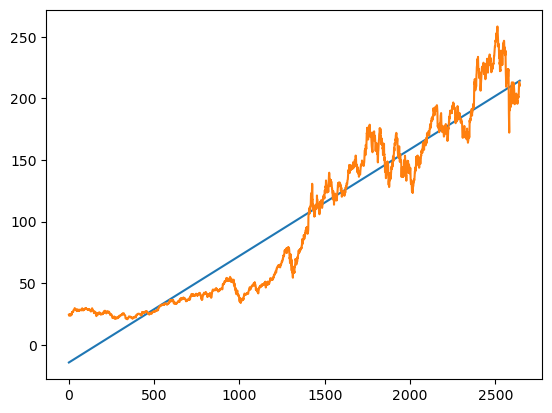

In [1000]:
plt.plot(np.arange(len(prices)),trendline)
plt.plot(np.arange(len(prices)), prices)
plt.show()

## Moving Average

In [1002]:
window = 12 
prices_ma = prices.rolling(window = window).mean()
prices_detrended = prices - prices_ma
prices_detrended = prices_detrended.dropna()

In [1003]:
adf_test(prices_detrended)

Adf Test Results:
Adf Statistics  -10.176461290448461
p-value 6.8718395734459546e-18


In [1004]:
6.7449301118593995e-09 <0.05

True

### So using moving trend we got stationary data 

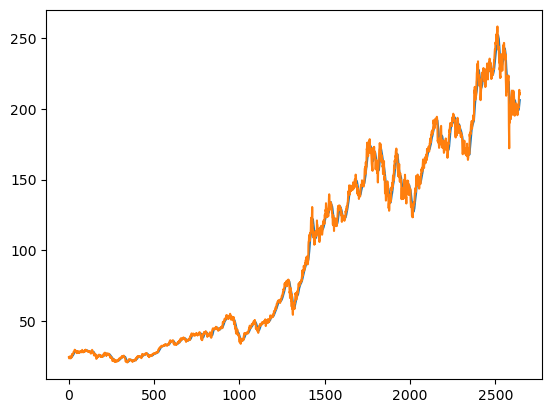

In [1006]:
plt.plot(np.arange(len(prices)),prices_ma)
plt.plot(np.arange(len(prices)), prices)
plt.show()

In [1007]:
from statsmodels.tsa.seasonal import seasonal_decompose 

decompostion = seasonal_decompose(prices , model ='additive', period = 30 )
prices_adjusted = prices/ decompostion.seasonal
prices_adjusted = prices_adjusted.dropna()

In [1008]:
adf_test(prices_adjusted)

Adf Test Results:
Adf Statistics  -7.606155156271884
p-value 2.3193791734784138e-11


In [1009]:
2.563482303830707e-16 < 0.05

True

### Using Seasonal decompostion the data got stationary 

# Time Series Forecasting Models

## PROPHET Model

In [1013]:
#!pip install prophet

In [1014]:
import seaborn as sns 
from prophet import Prophet 

import warnings 
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error , mean_absolute_error

In [1015]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2644 entries, 2015-01-02 to 2025-07-09
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   2644 non-null   float64
 1   (High, AAPL)    2644 non-null   float64
 2   (Low, AAPL)     2644 non-null   float64
 3   (Open, AAPL)    2644 non-null   float64
 4   (Volume, AAPL)  2644 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 123.9 KB


In [1016]:
df = stock_data

In [1017]:
df = df.reset_index()


In [1018]:
df

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-01-02,24.288580,24.757334,23.848706,24.746226,212818400
1,2015-01-05,23.604330,24.137511,23.417718,24.057533,257142000
2,2015-01-06,23.606552,23.866477,23.244433,23.668756,263188400
3,2015-01-07,23.937569,24.037539,23.704302,23.815381,160423600
4,2015-01-08,24.857302,24.915063,24.148616,24.266361,237458000
...,...,...,...,...,...,...
2639,2025-07-02,212.440002,213.339996,208.139999,208.910004,67941800
2640,2025-07-03,213.550003,214.649994,211.809998,212.149994,34955800
2641,2025-07-07,209.949997,216.229996,208.800003,212.679993,50229000


In [1019]:
df = df[['Date','Close']]

In [1020]:
df.columns =['ds','y']

In [1021]:
df

,ds,y
0,2015-01-02,24.288580
1,2015-01-05,23.604330
2,2015-01-06,23.606552
3,2015-01-07,23.937569
4,2015-01-08,24.857302
...,...,...
2639,2025-07-02,212.440002
2640,2025-07-03,213.550003
2641,2025-07-07,209.949997
2642,2025-07-08,210.009995


In [1022]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      2644 non-null   datetime64[ns]
 1   y       2644 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 41.4 KB


# Plot the data 

<Axes: xlabel='ds'>

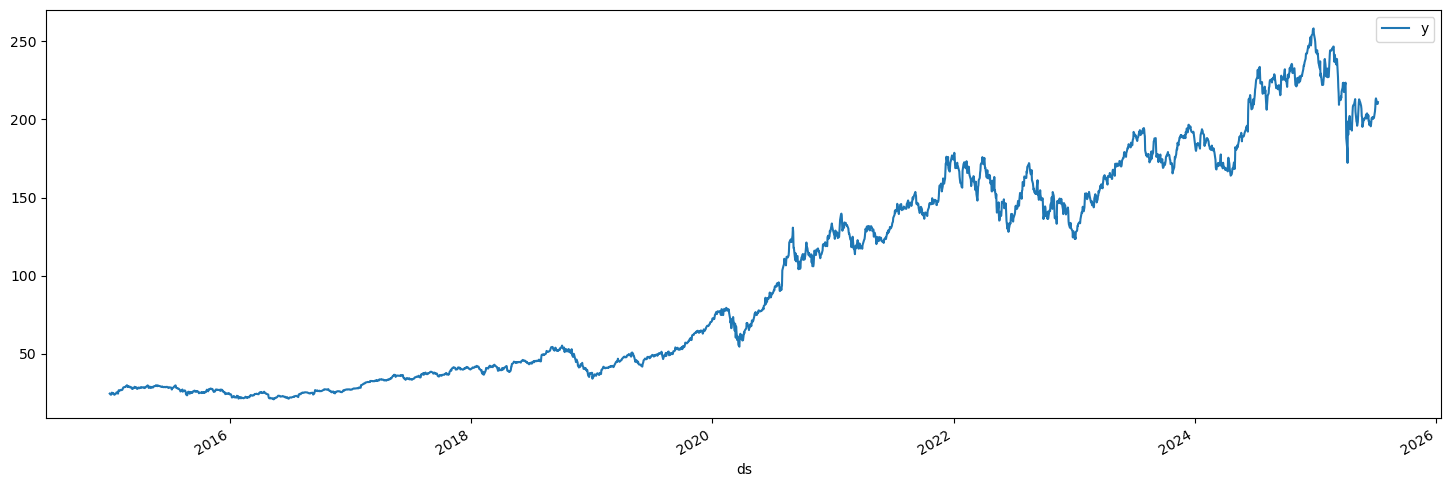

In [1024]:
df.plot(x='ds',y='y',figsize=(18,6))

13:51:35 - cmdstanpy - INFO - Chain [1] start processing
13:51:36 - cmdstanpy - INFO - Chain [1] done processing


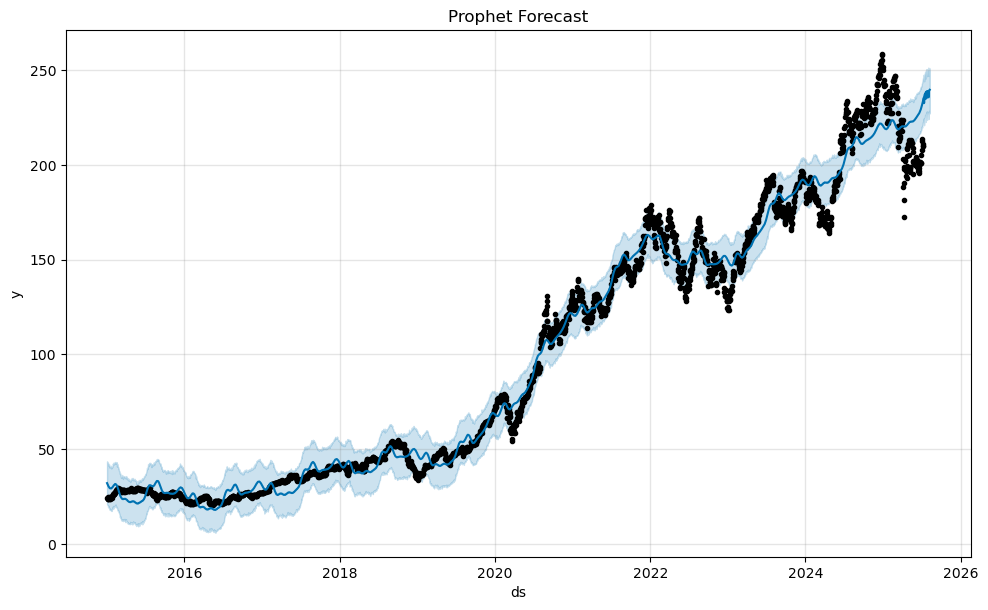

In [1065]:
model = Prophet()
model.fit(df)

future= model.make_future_dataframe(periods=30)

forecast = model.predict(future)


model.plot(forecast)
plt.title('Prophet Forecast')
plt.savefig('Prophet Forecasting.png')
plt.show()

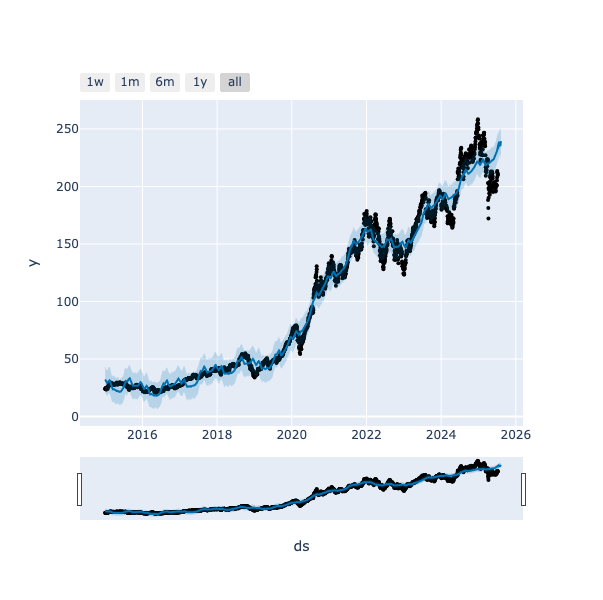

In [1067]:
from prophet.plot import plot_plotly,plot_components_plotly
plot_plotly(model,forecast)


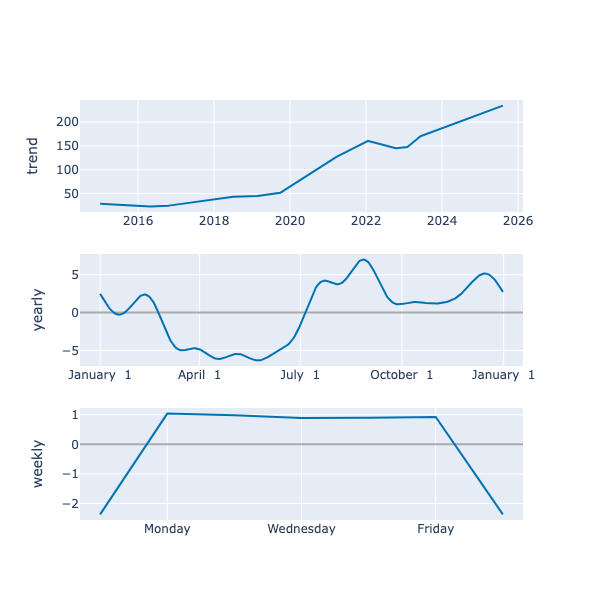

In [1068]:
plot_components_plotly(model,forecast)

In [1069]:
from statsmodels.tools.eval_measures import rmse 

In [1073]:
train = df.iloc[:len(df)-365]
test = df.iloc[len(df)-365:]

In [1075]:
prophet_pred = forecast.iloc[-365:]['yhat']

In [1077]:
print('Root Mean Squared Error between actual and predicted values:',rmse(prophet_pred,test['y'].values))
print("Mean Value of Test Dataset:",test['y'].mean())

Root Mean Squared Error between actual and predicted values: 19.227025998022736
Mean Value of Test Dataset: 210.57018332285423


## LSTM Model 

In [1080]:
#!pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [1082]:
df.tail()

,ds,y
2639,2025-07-02,212.440002
2640,2025-07-03,213.550003
2641,2025-07-07,209.949997
2642,2025-07-08,210.009995
2643,2025-07-09,211.139999


<Axes: >

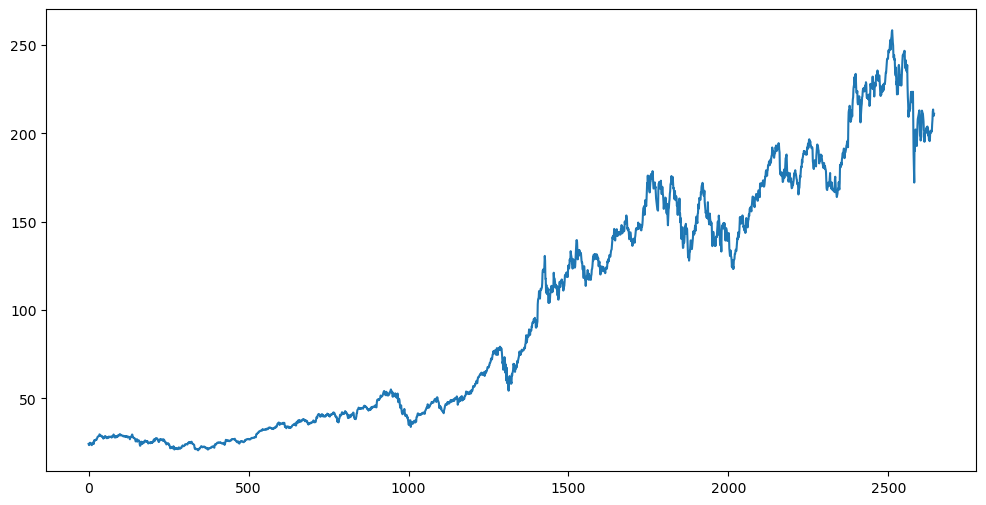

In [1084]:
df['y'].plot(figsize=(12,6))

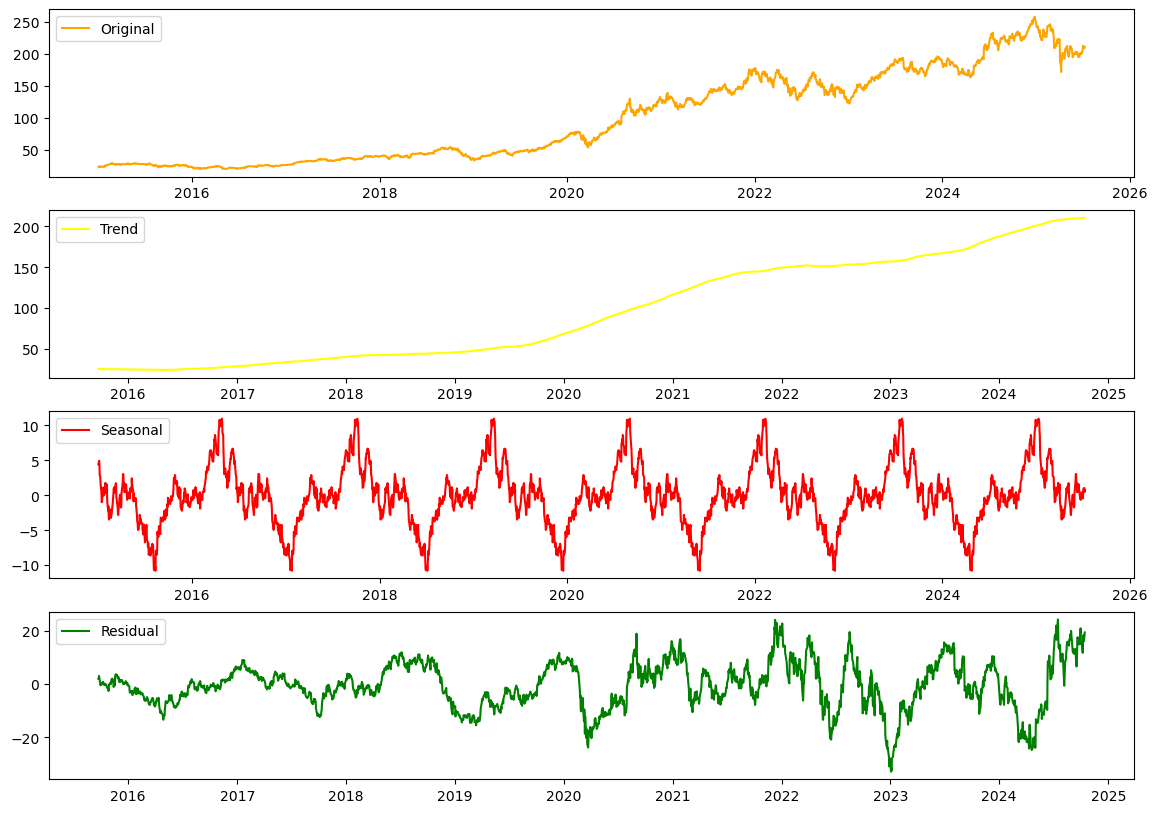

In [1086]:
plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(stock_data['Close'],label="Original",color='orange')
plt.legend(loc="upper left")
#plt.savefig('Original.png')


plt.subplot(412)
plt.plot(trend_additive,label="Trend",color='yellow')
plt.legend(loc="upper left")
#plt.savefig('Trend.png')



plt.subplot(413)
plt.plot(seasonal_additive,label="Seasonal",color='red')
plt.legend(loc="upper left")
#plt.savefig('Seasonal.png')


plt.subplot(414)
plt.plot(residual_additive,label="Residual",color='green')
plt.legend(loc="upper left")
#plt.savefig('Residual.png')


plt.show()

In [1087]:
len(df)

2644

In [1088]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [1092]:
df.head() , df.tail()

(          ds          y
 0 2015-01-02  24.288580
 1 2015-01-05  23.604330
 2 2015-01-06  23.606552
 3 2015-01-07  23.937569
 4 2015-01-08  24.857302,
              ds           y
 2639 2025-07-02  212.440002
 2640 2025-07-03  213.550003
 2641 2025-07-07  209.949997
 2642 2025-07-08  210.009995
 2643 2025-07-09  211.139999)

In [1094]:
if df.empty:
    print("Error: 'data' DataFrame is empty. Please check data loading or preprocessing.")
else:
    # *** The Fix: Select only the 'Close' column for scaling ***
    scaled_data = scaler.fit_transform(df[['y']].values.reshape(-1,1))
    
scaled_data.shape

(2644, 1)

In [1096]:
train_size = int(len(scaled_data) * 0.8)
train, test = scaled_data[:train_size], scaled_data[train_size:]

In [1098]:
def create_dataset(dataset, time_step=60):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        X.append(dataset[i:(i+time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

In [1100]:
time_step = 60
X_train, y_train = create_dataset(train, time_step)
X_test, y_test = create_dataset(test, time_step)

In [1102]:
# Reshape for LSTM input (samples, time_steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test  = X_test.reshape(X_test.shape[0],  X_test.shape[1], 1)

In [1104]:
# Build LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [1105]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0207  
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.8024e-04
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.6650e-04
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.3196e-04
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.7432e-04
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.2766e-04
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.2622e-04
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.1729e-04
Epoch 9/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.9720e-04
Epoch 10/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.9065e-04
Epoch 11/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.7852e-04
Epoch 12/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.8813e-04
Epoch 13/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.0301e-04
Epoch 14/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.8122e-04
Epoch 15/20
65/65

In [1107]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,955 (359.20 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,304 (239.47 KB)

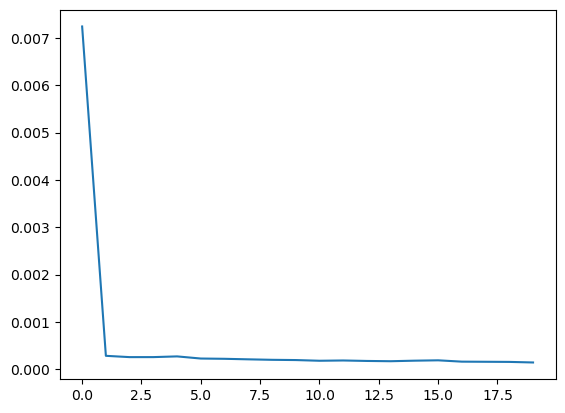

In [1108]:
loss_epoch = model.history.history['loss']
plt.plot(range(len(loss_epoch)),loss_epoch )

In [1109]:
train_predict = model.predict(X_train)
test_predict  = model.predict(X_test)

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [1110]:
train_predict = scaler.inverse_transform(train_predict)
test_predict  = scaler.inverse_transform(test_predict)

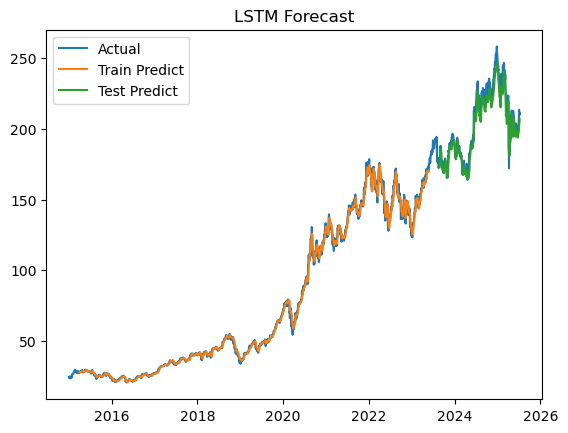

In [1111]:
plt.plot(df['ds'], df['y'], label='Actual')
plt.plot(df['ds'][time_step:len(train_predict)+time_step], train_predict, label='Train Predict')
plt.plot(df['ds'][len(train_predict)+(time_step*2)+1:len(stock_data)-1], test_predict, label='Test Predict')
plt.title('LSTM Forecast')
plt.legend()
plt.savefig('LSTM Forecast.png')
plt.show()

In [1112]:
from math import sqrt

In [1113]:
rmse_lstm = np.sqrt(mean_squared_error(df['y'][-30:], test_predict[-30:]))

In [1114]:
lstm_pred = test_predict[-30:]

In [1115]:
rmse_lstm

6.371725037893465

# ARIMA Model

### ACF and PACF Plot

To find the values of p,d,q

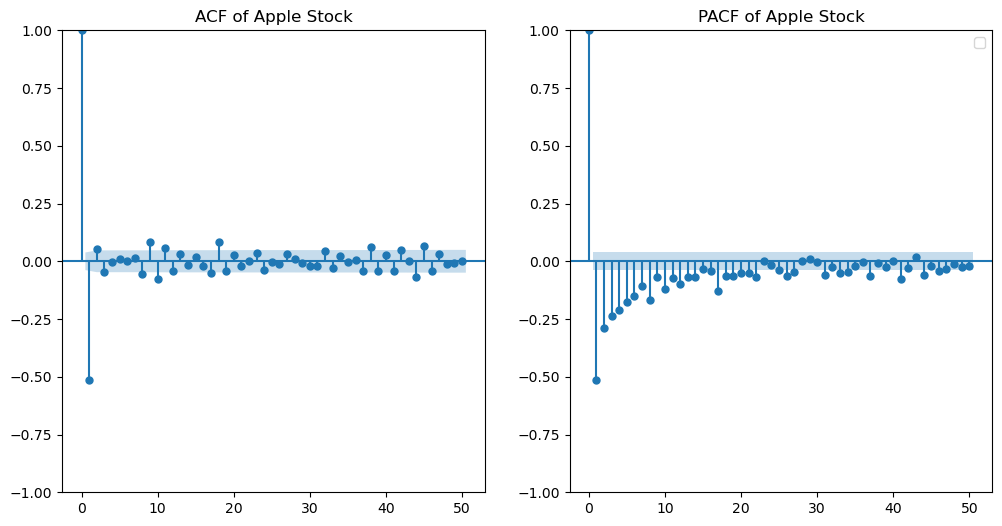

In [1118]:
from statsmodels.graphics.tsaplots import plot_acf ,plot_pacf
plt.figure(figsize=(12,6))

# ACF Plot 
plt.subplot(1,2,1)
plot_acf(stock_data['Close'].diff().diff().dropna(),ax =plt.gca(), lags=50)
plt.title('ACF of Apple Stock')

#PACF Plot 
plt.subplot(1,2,2)
plot_pacf(stock_data['Close'].diff().diff().dropna(),ax =plt.gca(), lags=50,method = 'ywm')
plt.title('PACF of Apple Stock')

plt.legend()
plt.show()

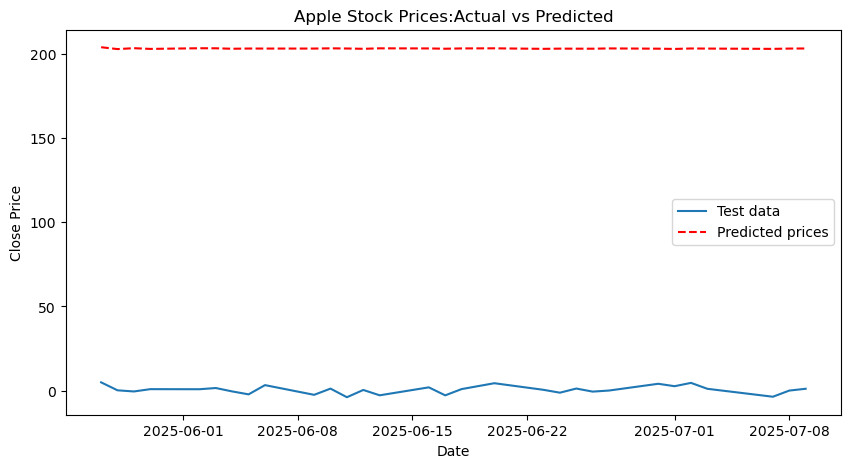

RMSE: 4.68


In [1149]:
from statsmodels.tsa.arima.model import ARIMA


model = ARIMA(train_data, order=(7,1,7))
model_fit = model.fit()

arima_pred = model_fit.predict(
    start = len(train_data),
    end = len(train_data) + len(test_data)-1,
    dynamic = False
)
last_price = df['y'].iloc[len(train_data)]
arima_pred = arima_pred_diff.cumsum() + last_price

# 3. Evaluate on actual closing prices
y_true = df['y'].iloc[-30:].values
# Plot the actual vs predicted 

plt.figure(figsize=(10,5))
plt.plot(test_data.index , test_data, label="Test data")
plt.plot(test_data.index , arima_pred, color = 'red',linestyle='--',label="Predicted prices")
plt.title('Apple Stock Prices:Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.savefig('ARIMA Forecast.png')
plt.show()

rmse = round(np.sqrt(mean_squared_error(y_true,arima_pred)),2)
print('RMSE:',rmse)

# SARIMA Model

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.70605D+00    |proj g|=  9.57985D-02


 This problem is unconstrained.



At iterate    5    f=  2.44506D+00    |proj g|=  2.74208D-02

At iterate   10    f=  2.40735D+00    |proj g|=  3.52661D-03

At iterate   15    f=  2.40159D+00    |proj g|=  5.54185D-03

At iterate   20    f=  2.40093D+00    |proj g|=  3.30875D-03

At iterate   25    f=  2.40083D+00    |proj g|=  9.11815D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     49      1     0     0   9.118D-04   2.401D+00
  F =   2.4008322791273948     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


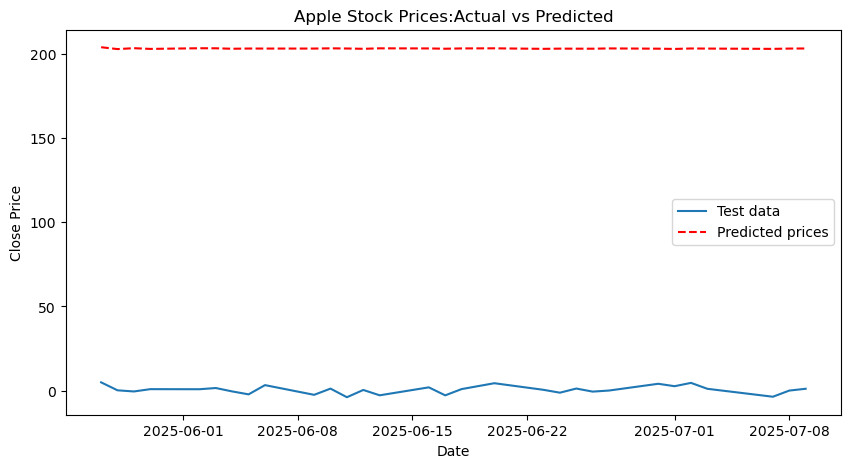

RMSE: 4.68


In [1120]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

p,d,q = 1,1,1
P,D,Q,s = 1,1,1,12

model = SARIMAX(train_data, order=(p,d,q),seasonal_order=(P,D,Q,s))
model_fit = model.fit()

sarima_pred_diff = model_fit.predict(
    start = len(train_data),
    end = len(train_data) + len(test_data)-1,
    dynamic = False
)
# Plot the actual vs predicted 

last_close_price = df['y'].iloc[len(train_data)]

sarima_pred = sarima_pred_diff.cumsum() + last_close_price


plt.figure(figsize=(10,5))
plt.plot(test_data.index , test_data, label="Test data")
plt.plot(test_data.index , sarima_pred, color = 'red',linestyle='--',label="Predicted prices")
plt.title('Apple Stock Prices:Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.savefig('SARIMA Forecast.png')
plt.show()

rmse = round(np.sqrt(mean_squared_error(y_true,sarima_pred)),2)
print('RMSE:',rmse)

# Evaluation Metrics

In [1123]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import pandas as pd
import numpy as np

y_true = df['y'].iloc[-30:].values
y_true = np.array(y_true)

test = df.iloc[len(df)-365:]   


models = {
    "ARIMA": (arima_pred, y_true),
    "SARIMA": (sarima_pred, y_true),
    "LSTM": (lstm_pred, df['y'][-30:]),
    "PROPHET": (prophet_pred, test['y'].values) 
}

# Metric function
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100
    return round(rmse, 2), round(mae, 2), round(mape, 2)

results = {"Model": [], "RMSE": [], "MAE": [], "MAPE (%)": []}

for model_name, (preds, y_true) in models.items():
    rmse, mae, mape = evaluate_model(y_true, preds)
    results["Model"].append(model_name)
    results["RMSE"].append(rmse)
    results["MAE"].append(mae)
    results["MAPE (%)"].append(mape)

metrics_df = pd.DataFrame(results)
display(metrics_df)


,Model,RMSE,MAE,MAPE (%)
0,ARIMA,4.68,3.75,1.84
1,SARIMA,4.68,3.75,1.84
2,LSTM,6.37,5.30,2.59
3,PROPHET,19.23,16.21,7.92


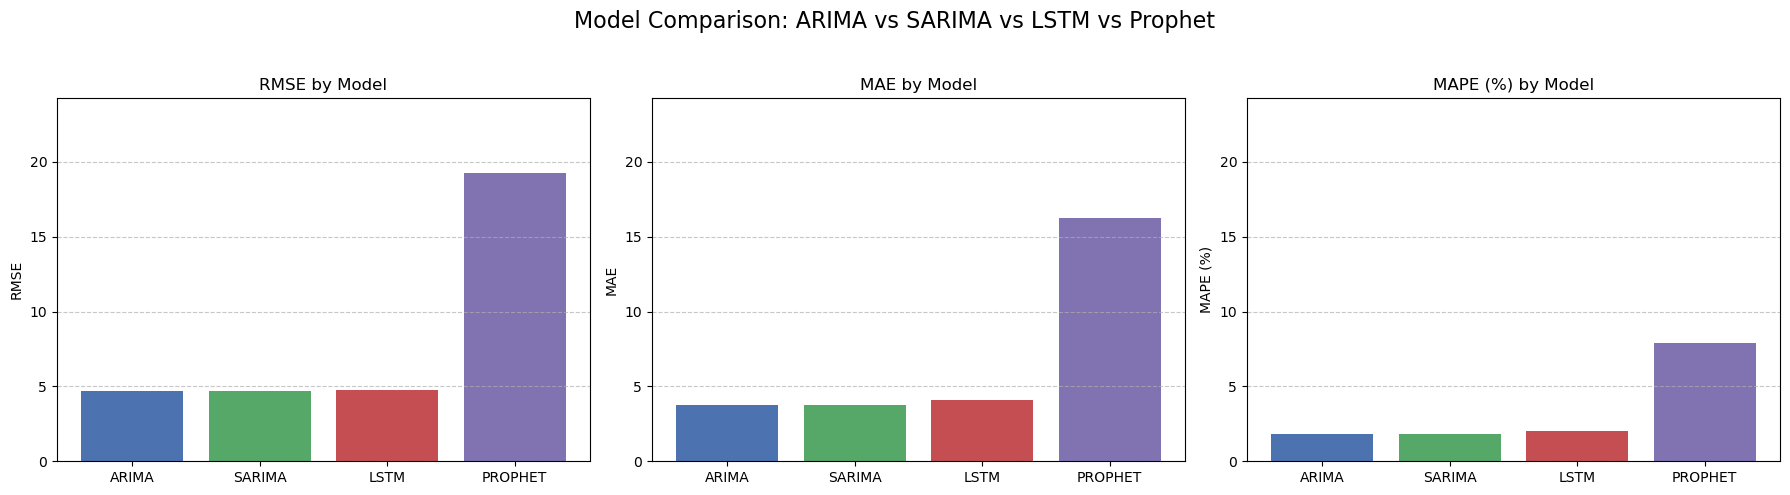

In [1151]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Define model performance data
data = {
    "Model": ["ARIMA", "SARIMA", "LSTM", "PROPHET"],
     "RMSE": [4.68, 4.68, 4.77, 19.24],
    "MAE": [3.75, 3.75, 4.09, 16.22],
    "MAPE": [1.84, 1.84, 2.01, 7.92]
}

graph = pd.DataFrame(data)

# Step 2: Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
colors = ['#4c72b0', '#55a868', '#c44e52', '#8172b2']

# Step 3: Plot RMSE
axes[0].bar(graph["Model"], graph["RMSE"], color=colors)
axes[0].set_title("RMSE by Model")
axes[0].set_ylabel("RMSE")

# Step 4: Plot MAE
axes[1].bar(graph["Model"], graph["MAE"], color=colors)
axes[1].set_title("MAE by Model")
axes[1].set_ylabel("MAE")

# Step 5: Plot MAPE
axes[2].bar(graph["Model"], graph["MAPE"], color=colors)
axes[2].set_title("MAPE (%) by Model")
axes[2].set_ylabel("MAPE (%)")

# Step 6: Customize axes
for ax in axes:
    ax.set_ylim(0, max(graph["MAPE"].max(), graph["RMSE"].max(), graph["MAE"].max()) + 5)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Step 7: Title and layout
plt.suptitle("Model Comparison: ARIMA vs SARIMA vs LSTM vs Prophet", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Step 8: Save image
plt.savefig("model_comparison.png")  # Saves to current working directory

# Step 9: Show plot
plt.savefig("Model Evaluation.png")
plt.show()
